<a href="https://colab.research.google.com/github/yuehaoshi/Solar_Energy_Appliation/blob/main/Solar_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install basemap-data
!pip install basemap-data-hires

     |████████████████████████████████| 30.5 MB 1.5 MB/s 


     |████████████████████████████████| 91.1 MB 79 kB/s 


In [4]:
!pip install basemap
#https://community.insaid.co/hc/en-us/community/posts/360048243414-Installing-Importing-of-Basemap-in-Google-Colab
#https://github.com/matplotlib/basemap

  Using cached basemap-1.3.0b1-cp37-cp37m-manylinux1_x86_64.whl (881 kB)
  Using cached pyshp-2.1.3.tar.gz (219 kB)
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=0cc5c562d1846d30df859a3baedb1b1a533d88cb3e3cc0f772965294b2ad680b
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [1]:
import numpy as np
import math
import requests
import plotly
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from google.colab.patches import cv2_imshow
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


States boundary of US

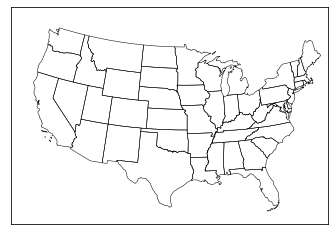

In [2]:
# Lambert Conformal map of lower 48 states.
'''m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)'''
m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/content/drive/MyDrive/Courses/CS519/cb_2018_us_state_20m/cb_2018_us_state_20m','states',drawbounds=True)


PSH map for each state

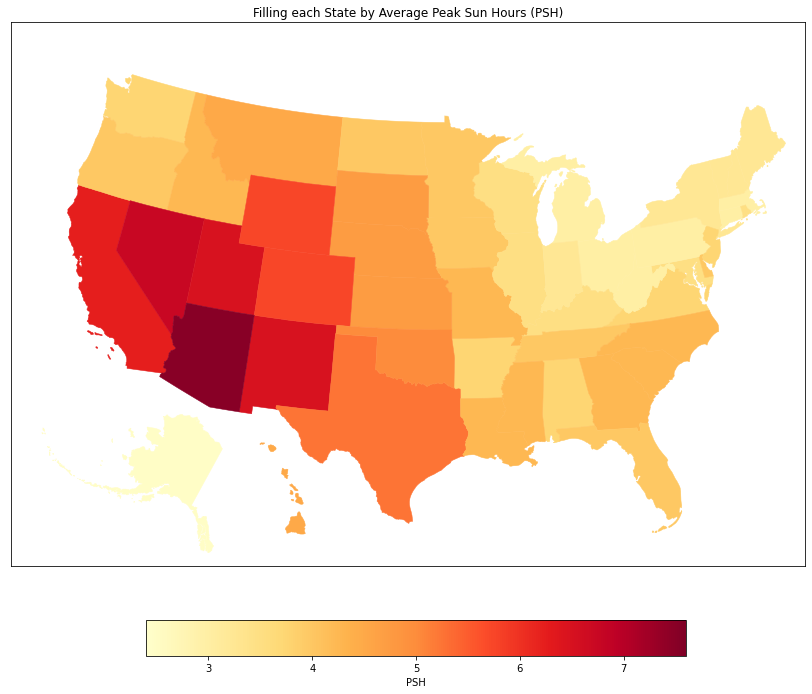

In [3]:
#Adapted from https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/content/drive/MyDrive/Courses/CS519/cb_2018_us_state_20m/cb_2018_us_state_20m','states',drawbounds=True, color="white", linewidth=0)
shp_info
PeakSunHour = {
'Alabama':3.75,
'Alaska': 2.5,
'Arizona':7.5,
'Arkansas':3.75,
'California':6.25,
'Colorado':5.75,
'Connecticut':3,
'Delaware':4,
'Florida':4,
'Georgia':4.25,
'Hawaii':4.5,
'Idaho':4.25,
'Illinois':3.5,
'Indiana':3.25,
'Iowa':4,
'Kansas':4.75,
'Kentucky':3.5,
'Louisiana':4.25,
'Maine':3.25,
'Maryland':3.5,
'Massachusetts':3,
'Michigan':3,
'Minnesota':4,
'Mississippi':4.25,
'Missouri':4.25,
'Montana':4.5,
'Nebraska':4.75,
'Nevada':6.75,
'New Hampshire':3.25,
'New Jersey':3.75,
'New Mexico':6.5,
'New York':3.25,
'North Carolina':4.25,
'North Dakota':4,
'Ohio':3,
'Oklahoma':5,
'Oregon':4,
'Pennsylvania':3,
'Rhode Island':3.5,
'South Carolina':4.25,
'South Dakota':4.75,
'Tennessee':4,
'Texas':5.25,
'Utah':6.5,
'Vermont':3.25,
'Virginia':3.75,
'Washington':3.75,
'West Virginia':3,
'Wisconsin':3.5,
'Wyoming':5.75
}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.YlOrRd # use 'YlOrRd' colormap
#cmap = plt.cm.summer
vmin = 2.4; vmax = 7.6 # set range.
#vmin = min(popdensity.values()); vmax = max(popdensity.values())
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename in PeakSunHour:
        hour = PeakSunHour[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = mapper.to_rgba(hour)
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
fig = plt.gcf()
fig.set_size_inches(15,10)

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg = list(map(lambda xy: (0.35*xy[0] + 1100000, 0.35*xy[1]-1300000), seg))
        if statenames[nshape] == 'Hawaii':
            seg = list(map(lambda xy: (xy[0] + 5200000, xy[1]-1400000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color, linewidth=.5)
        ax.add_patch(poly)
plt.title('Filling each State by Average Peak Sun Hours (PSH)')

# construct custom colorbar
cax = fig.add_axes([0.27, 0, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
#cb.ax.invert_xaxis()
cb.ax.set_xlabel('PSH')
plt.show()

(0.0, 1185.0, 0.0, 811.0)

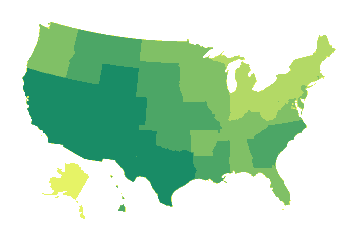

In [4]:
img = cv2.imread('/content/drive/MyDrive/Courses/CS519/Screen Shot 2021-11-28 at 22.01.26.png')
x = []
y = []
z = []
for i in range(img.shape[0]):
  curr = []
  y.append(i)
  for j in range(img.shape[1]):
    rgb = 65536 * img[i][j][0] + 256 * img[i][j][1] + img[i][j][2];
    curr.append(rgb)
    if i == 0:
      x.append(j)
  z.append(curr)
#print("x", x)
#print("y", y)
#print("shapez", np.shape(z))
#print("z", z)
#z = np.ma.array(z, mask=(z == 16777215))
y.reverse()

cmap=plt.cm.summer
cmap.set_over('white')
cs = plt.contourf(x,y,z,5, cmap=cmap, extend="max")
plt.axis('off')